# Analysis of protein abundance in _e.coli_

This notebook shows the use of pybenford module with protein abundance data. The protein abundance data are from [PRIDE](https://www.ebi.ac.uk/pride/) : https://www.ebi.ac.uk/pride/archive/projects/PXD024151  
This is an analysis of the proteome of _Escherichia coli_ during sudden carbon starvation. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

import pybenford as benford

## Loading dataset

In [3]:
if not os.path.exists("e033784_Proteins.xlsx"):
    !wget https://www.ebi.ac.uk/pride/data/archive/2021/03/PXD024151/e033784_Proteins.xlsx

--2021-06-21 09:38:46--  https://www.ebi.ac.uk/pride/data/archive/2021/03/PXD024151/e033784_Proteins.xlsx
Resolving www.ebi.ac.uk (www.ebi.ac.uk)... 193.62.193.80
Connecting to www.ebi.ac.uk (www.ebi.ac.uk)|193.62.193.80|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://ftp.pride.ebi.ac.uk/pride/data/archive/2021/03/PXD024151/e033784_Proteins.xlsx [following]
--2021-06-21 09:38:46--  http://ftp.pride.ebi.ac.uk/pride/data/archive/2021/03/PXD024151/e033784_Proteins.xlsx
Resolving ftp.pride.ebi.ac.uk (ftp.pride.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.pride.ebi.ac.uk (ftp.pride.ebi.ac.uk)|193.62.197.74|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 511702 (500K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: 'e033784_Proteins.xlsx'

e033784_Proteins.xl 100%[===================>] 499.71K  1.55MB/s    in 0.3s    

2021-06-21 09:38:47 (1.55 MB/s) - 'e033784_Proteins.xlsx' saved [511

## Exploration of dataset

In [4]:
data = pd.read_excel('e033784_Proteins.xlsx')
data.shape

(2259, 31)

In [5]:
data.head()

,Checked,Protein FDR Confidence Combined,Master,Accession,Description,Exp q-value Combined,Sum PEP Score,Coverage in Percent,Number of Peptides,Number of PSMs,...,Abundances Normalized F4 Sample,Abundance F1 Sample,Abundance F2 Sample,Abundance F3 Sample,Abundance F4 Sample,Found in Sample in S1 F1 Sample,Found in Sample in S2 F2 Sample,Found in Sample in S3 F3 Sample,Found in Sample in S4 F4 Sample,Modifications
0,False,High,IsMasterProtein,P0A8V2,DNA-directed RNA polymerase subunit beta OS=Es...,0.0,669.114,72,95,794,...,2.233296e+09,2.107560e+09,1.126121e+09,8.542110e+08,2.765100e+08,High,High,High,High,NaN
1,False,High,IsMasterProtein,P0A8T7,DNA-directed RNA polymerase subunit beta' OS=E...,0.0,596.904,68,91,841,...,1.950036e+09,2.005228e+09,1.126856e+09,8.781706e+08,2.414389e+08,High,High,High,High,NaN
2,False,High,IsMasterProtein,P0A6F5,60 kDa chaperonin OS=Escherichia coli (strain ...,0.0,503.063,93,53,1435,...,5.664362e+09,4.516081e+09,2.140958e+09,1.842317e+09,7.013190e+08,High,High,High,High,NaN
3,False,High,IsMasterProtein,P0AFG8,Pyruvate dehydrogenase E1 component OS=Escheri...,0.0,450.292,72,75,758,...,3.326486e+09,3.315792e+09,1.710860e+09,1.433563e+09,4.118607e+08,High,High,High,High,NaN
4,False,High,IsMasterProtein,P0A705,Translation initiation factor IF-2 OS=Escheric...,0.0,424.883,73,74,429,...,9.685164e+08,1.348475e+09,6.278798e+08,4.037779e+08,1.199145e+08,High,High,High,High,NaN


In [6]:
data.columns

Index(['Checked', 'Protein FDR Confidence Combined', 'Master', 'Accession',
       'Description', 'Exp q-value Combined', 'Sum PEP Score',
       'Coverage in Percent', 'Number of Peptides', 'Number of PSMs',
       'Number of Unique Peptides', 'Number of Protein Groups',
       'Number of AAs', 'MW in kDa', 'calc pI', 'Score Sequest HT Sequest HT',
       'Number of Peptides by Search Engine Sequest HT',
       'Number of Razor Peptides', 'Abundances Normalized F1 Sample',
       'Abundances Normalized F2 Sample', 'Abundances Normalized F3 Sample',
       'Abundances Normalized F4 Sample', 'Abundance F1 Sample',
       'Abundance F2 Sample', 'Abundance F3 Sample', 'Abundance F4 Sample',
       'Found in Sample in S1 F1 Sample', 'Found in Sample in S2 F2 Sample',
       'Found in Sample in S3 F3 Sample', 'Found in Sample in S4 F4 Sample',
       'Modifications'],
      dtype='object')

There are 4 samples, with raw and normalised protein abundance data.   
The raw data of the samples are :  
- Abundance F1 Sample 
- Abundance F2 Sample 
- Abundance F3 Sample 
- Abundance F4 Sample  

And the normalised data of th samples are :  
- Abundances Normalized F1 Sample 
- Abundances Normalized F2 Sample 
- Abundances Normalized F3 Sample 
- Abundances Normalized F4 Sample

## Analysis of protein abundance data for all 4 samples of normalised data
### data preparation and cleaning

In [7]:
abundance_tot_norm = ['Abundances Normalized F1 Sample', 'Abundances Normalized F2 Sample',
                      'Abundances Normalized F3 Sample', 'Abundances Normalized F4 Sample']

abundance_tot_norm = data[abundance_tot_norm]
print(abundance_tot_norm.shape)

(2259, 4)


In [8]:
# data in an array of one dimension
abundance_tot_norm = abundance_tot_norm.values.reshape(abundance_tot_norm.shape[0] * abundance_tot_norm.shape[1])
print(abundance_tot_norm.shape)
abundance_tot_norm

(9036,)


array([2.10755997e+09, 2.23397114e+09, 2.23728970e+09, ...,
                  nan,            nan,            nan])

In [9]:
# remove 0
abundance_tot_norm = abundance_tot_norm[abundance_tot_norm > 0]
print(abundance_tot_norm.shape)

(8096,)


After cleaning the data we have 8096 protein abundance data.

## Analysis of the physical order of magnitude and the order of magnitude
### 

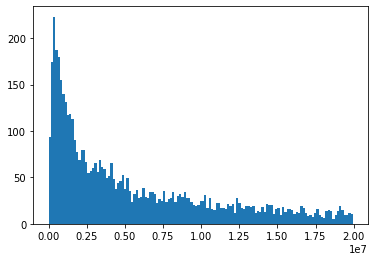

In [10]:
plt.hist(abundance_tot_norm, bins=range(0, 20_000_000, 150_000))
plt.title(label="")
plt.xlab("")
plt.ylab("");